In [4]:
import pandas as pd

# 데이터 로드
file_path = 'Mental Health Dataset.csv'
data = pd.read_csv(file_path)

# 데이터 기본 정보 확인
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [10]:
# No, Yes, Maybe, Not sure을 숫자로 변환하는 함수
def custom_encoding(value):
    if value == 'No':
        return 0
    elif value == 'Yes':
        return 1
    elif value in ['Maybe', 'Not sure']:
        return 0.5
    else:
        return value  # 다른 값은 그대로 반환 (Label Encoding 대상)

In [11]:
# 범주형 변수를 위한 Label Encoder 초기화
label_encoders = {}

# 열마다 전처리 적용
for column in data.select_dtypes(include=['object']).columns:
    unique_values = data[column].unique()
    if set(unique_values) <= {'No', 'Yes', 'Maybe', 'Not sure'}:
        data[column] = data[column].apply(custom_encoding)
    else:
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

In [12]:
# 변환된 데이터 확인
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Timestamp                292364 non-null  int32
 1   Gender                   292364 non-null  int32
 2   Country                  292364 non-null  int32
 3   Occupation               292364 non-null  int32
 4   self_employed            292364 non-null  int32
 5   family_history           292364 non-null  int32
 6   treatment                292364 non-null  int32
 7   Days_Indoors             292364 non-null  int32
 8   Growing_Stress           292364 non-null  int32
 9   Changes_Habits           292364 non-null  int32
 10  Mental_Health_History    292364 non-null  int32
 11  Mood_Swings              292364 non-null  int32
 12  Coping_Struggles         292364 non-null  int32
 13  Work_Interest            292364 non-null  int32
 14  Social_Weakness          292364 non-

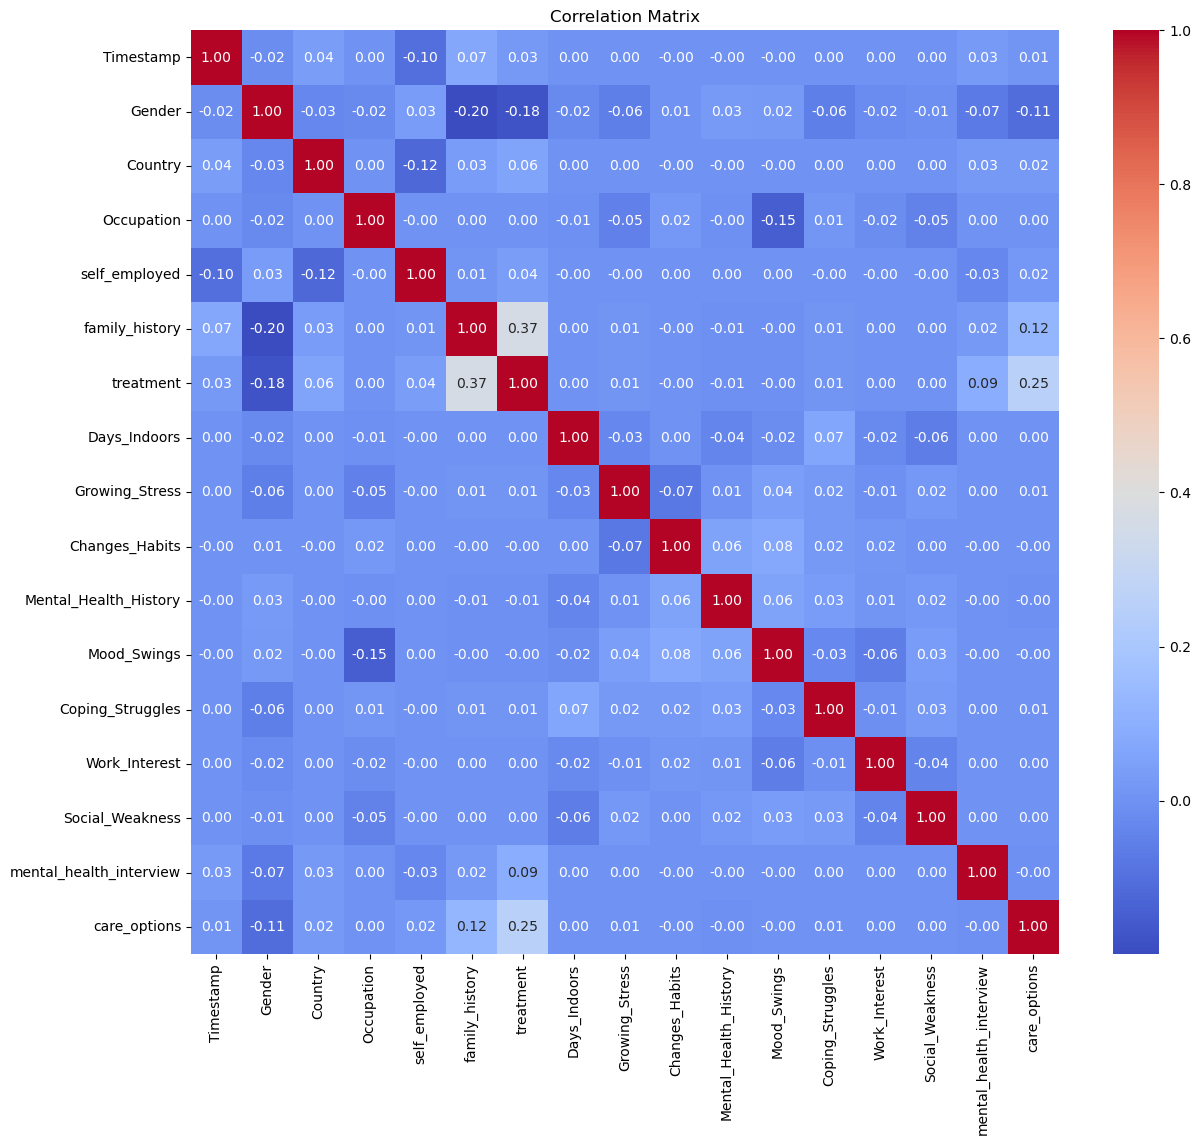

In [13]:
# 상관관계 행렬 계산
correlation_matrix = data.corr()

# 상관관계 행렬 시각화
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()